# Introduction

text

# Implementation
## Data Preparation
Let's start by importing the packages: numpy, pandas and matplotlib

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


Now let's download and view the data

In [32]:
BASE_PATH = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
cases = pd.read_csv(f'{BASE_PATH}time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv(f'{BASE_PATH}time_series_covid19_deaths_US.csv')

print(cases.head(), cases.columns)
print(deaths.head(), deaths.columns)

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

Let's analyse the data from California. Let's set the dates as index and the county names as columns. I'll split up the steps for clarity, but the code right hereafter can be combined into one single line to save memory space. An example for this can be found for the "deaths" dataframe.

In [33]:
# Select Californian data only
cases_california = cases[cases['Province_State']== 'California']

# Set the County names as index
cases_california_indexed = cases_california.set_index('Admin2')

# Transpose such that County names become column names and dates become index
cases_CA_T = cases_california_indexed.T

# Remove remaining unwanted data
dropped_columns = ['UID','iso2','iso3',
                               'code3','FIPS','Province_State',
                               'Country_Region','Lat','Long_',
                               'Combined_Key']
cases_clean = cases_CA_T.drop(dropped_columns)
del (cases_california, cases_california_indexed, cases_CA_T)

# Same process for deaths but in single line
deaths_clean = (deaths[deaths["Province_State"] == "California"]
                .set_index("Admin2").T
                .drop(dropped_columns)
                .drop("Population",axis=0))


print(cases_clean.head)

<bound method NDFrame.head of Admin2  Alameda Alpine Amador  Butte Calaveras Colusa Contra Costa Del Norte  \
1/22/20       0      0      0      0         0      0            0         0   
1/23/20       0      0      0      0         0      0            0         0   
1/24/20       0      0      0      0         0      0            0         0   
1/25/20       0      0      0      0         0      0            0         0   
1/26/20       0      0      0      0         0      0            0         0   
...         ...    ...    ...    ...       ...    ...          ...       ...   
3/5/23   401161    143  11540  51916      9634   5330       294922      8398   
3/6/23   401161    143  11540  51916      9634   5330       294922      8398   
3/7/23   402158    143  11553  51967      9650   5341       295632      8405   
3/8/23   402158    143  11553  51967      9650   5341       295632      8405   
3/9/23   402160    143  11553  51967      9650   5346       295633      8405   

Admin2  E

## Initial visualisation
Now let's visualise the data of some counties near San Francisco. First, let's plot the data to get a feel for it.

<Figure size 2500x1500 with 0 Axes>

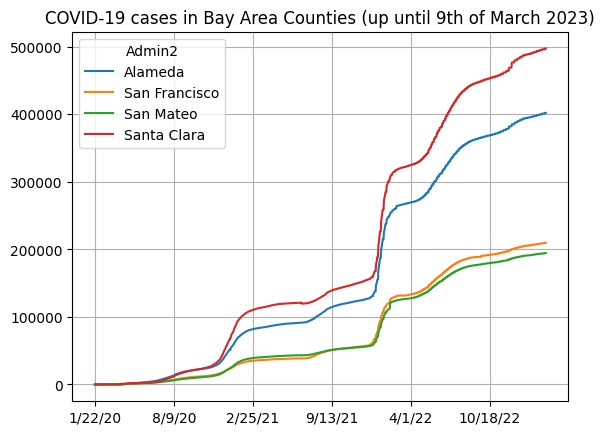

In [34]:
counties = ['Alameda', 'San Francisco', 'San Mateo', 'Santa Clara']

fig = plt.figure(figsize=(25,15))
plot = cases_clean[counties].plot()
plot.set_title('COVID-19 cases in Bay Area Counties (up until 9th of March 2023)')
plt.grid()
plt.show()

Let's plot the casualties as well

<Figure size 2500x1500 with 0 Axes>

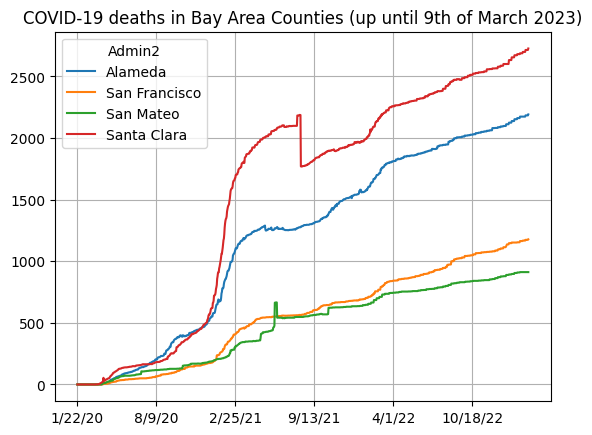

In [35]:
fig = plt.figure(figsize=(25,15))
plot = deaths_clean[counties].plot()
plot.set_title('COVID-19 deaths in Bay Area Counties (up until 9th of March 2023)')
plt.grid()
plt.show()

The data shows an upward trend, but is hard to compare: we don't know the number of inhabitants per county, yet. The results above might therefore be misleading. Furthermore, it would be interesting to see the average amount of cases and deaths per week. Let's do it!

## Incorporating Additional Data
Let's include the rolling average of the cases and deaths, next to the cases per million inhabitants.

In [80]:
# compute rolling average per 7 days
cases_diff = cases_clean.diff().rolling(window=7).mean()
deaths_diff = deaths_clean.diff().rolling(window=7).mean()

# import population data
population = pd.read_csv('https://gist.githubusercontent.com/NillsF/7923a8c7f27ca98ec75b7e1529f259bb/' \
'raw/3bedefbe2e242addba3fb47cbcd239fbed16cd54/california.csv')

# correct naming of counties
population['CTYNAME'] = population['CTYNAME'].str.replace(' County', '')
population_clean =  population.drop('GrowthRate', axis=1).set_index('CTYNAME')

# Compute cases and deaths per million
cases_per_million = cases_clean.copy()
deaths_per_million = deaths_clean.copy()

for county in counties:
    population_county = population.loc[population['CTYNAME'] == county, 'Pop'].item()
    cases_per_million[county] = cases_per_million[county]/population_county*1e6
    deaths_per_million[county] = cases_per_million[county]/population_county*1e6

# compute rolling average cases per million
cases_per_million_diff = cases_per_million.diff().rolling(window=7).mean()
deaths_per_million_diff = deaths_per_million.diff().rolling(window=7).mean()

## Additional Plotting


<Figure size 2500x1500 with 0 Axes>

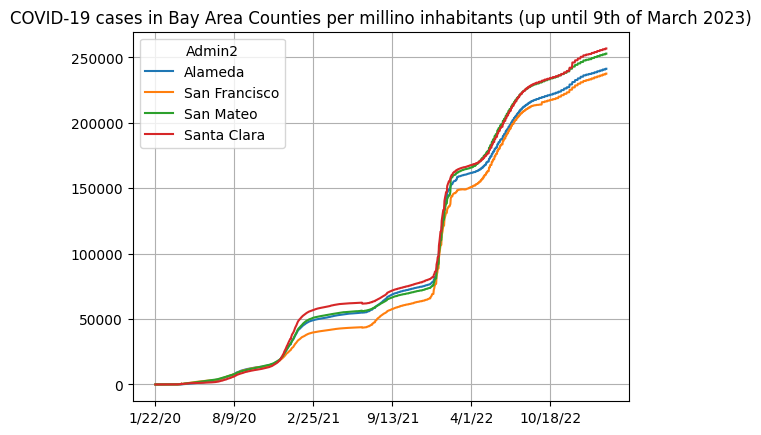

<Figure size 2500x1500 with 0 Axes>

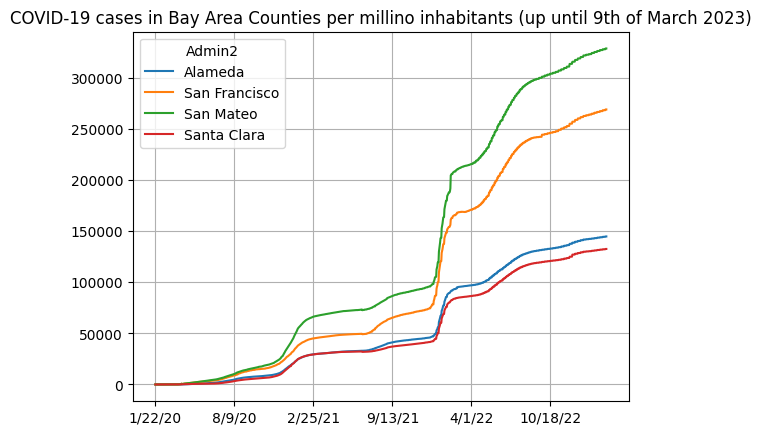

<Figure size 2500x1500 with 0 Axes>

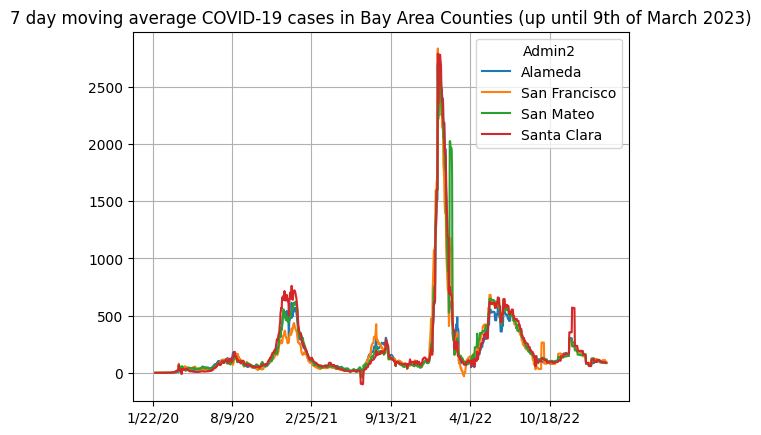

<Figure size 2500x1500 with 0 Axes>

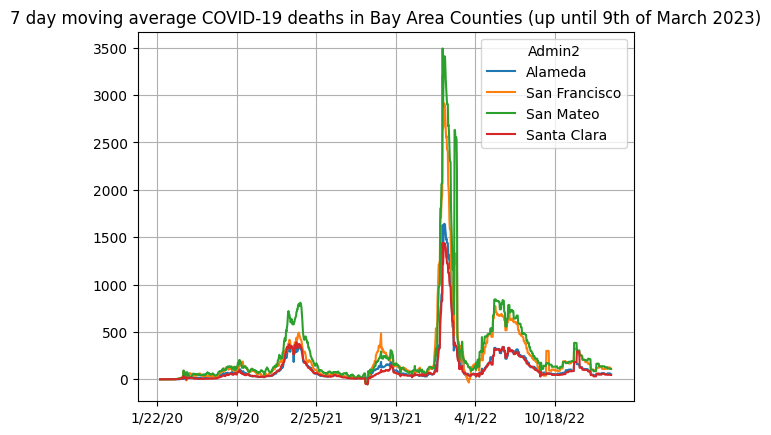

In [ ]:
fig = plt.figure(figsize=(25,15))
plot = cases_per_million[counties].plot()
plot.set_title('COVID-19 cases in Bay Area Counties per million inhabitants (up until 9th of March 2023)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(25,15))
plot = deaths_per_million[counties].plot()
plot.set_title('COVID-19 cases in Bay Area Counties per million inhabitants (up until 9th of March 2023)')
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,15))
plot = cases_per_million_diff[counties].plot()
plot.set_title('7 day moving average COVID-19 cases in Bay Area Counties per million inhabitants (up until 9th of March 2023)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(25,15))
plot = deaths_per_million_diff[counties].plot()
plot.set_title('7 day moving average COVID-19 deaths in Bay Area Counties per million inhabitants (up until 9th of March 2023)')
plt.grid()
plt.show()